area size: 1.00
area size: 1.00
area size: 1.00
area size: 1.00
area size: 1.00
area size: 1.00


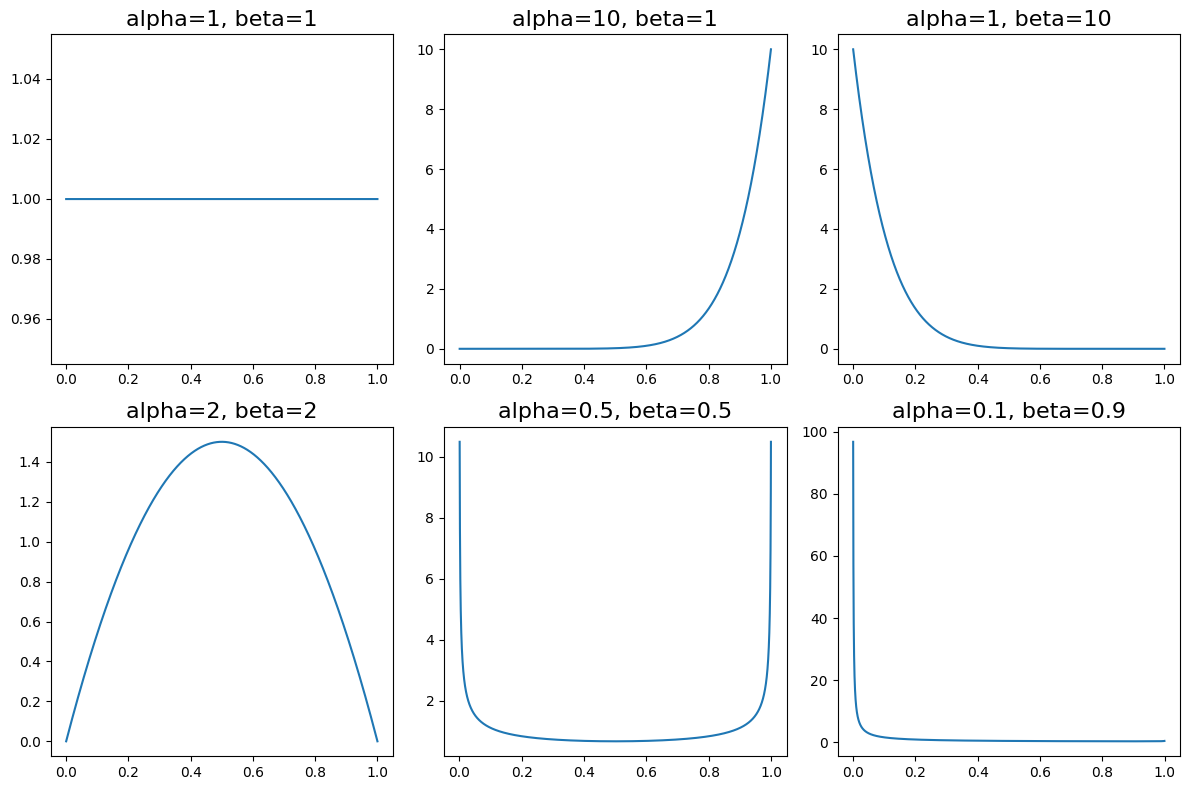

In [61]:
# Beta distribution: alpha and beta examples

import matplotlib.pyplot as plt
import numpy as np


def beta_pdf(x, alpha, beta, dt):
    numerator = x**(alpha-1) * (1-x)**(beta-1)
    # this is the normalisation part
    # the total height of the distribution multiplied by the width of the bin
    # think like a looooong rectangular shape by a short width
    denominator = sum(numerator) * dt
    return numerator / denominator

params = [
    (1, 1),
    (10, 1),
    (1, 10),
    (2, 2),
    (0.5, 0.5),
    (0.1, 0.9),
]

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, (alpha, beta) in enumerate(params):
    # 10^4 points are enough to get a smooth curve
    # with digital data, it is impossible to replicate a complete continuous curve
    x = np.linspace(0, 1, 10000)
    t = np.linspace(0, 1, 10000)
    dt = t[1] - t[0]

    if alpha < 1 or beta < 1:
        # 0 ** -0.1 = 1 / 0**0.1
        # Dividing by 0 becomes infinity
        # This is a problem when using alpha and beta < 1
        # so we need to start x \in [0,1] with a small epsilon
        eps = 1e-3
        x = np.linspace(eps, 1-eps, 10000)
        t = np.linspace(eps, 1-eps, 10000)
        dt = t[1] - t[0]

    density = beta_pdf(x, alpha, beta, dt)
    # now each density times height and its sum should be 1
    # satisfying one of the properties of probability density function
    print(f"area size: {sum(density) * dt:.2f}")
    axs[i // 3, i % 3].plot(x, density)
    axs[i // 3, i % 3].set_title(
        f'alpha={alpha}, beta={beta}',
        fontsize=16,
    )
plt.tight_layout()
plt.show()


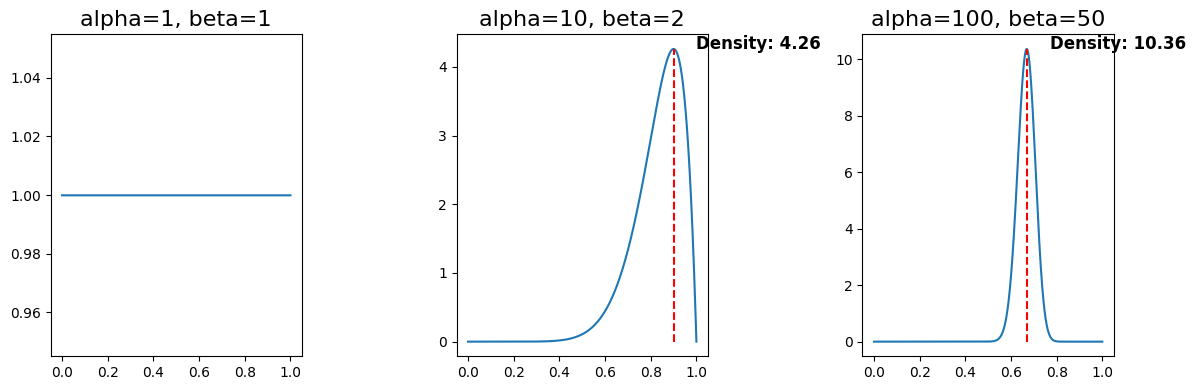

In [83]:
# Beta distribution: alpha and beta examples
x = np.linspace(0, 1, 10000)
t = np.linspace(0, 1, 10000)
dt = t[1] - t[0]

params = [
    (0.5, 1, 1),
    (0.9, 10, 2),
    (0.6689, 100, 50),
]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

def find_closest_x(x, prob):
    return np.argmin(np.abs(x - prob))

for i, (prob, alpha, beta) in enumerate(params):
    y = beta_pdf(x, alpha, beta, dt)
    axs[i].plot(x, y)
    axs[i].set_title(
        f'alpha={alpha}, beta={beta}',
        fontsize=16,
    )
    x_idx = find_closest_x(x, prob)
    y_point = y[x_idx]
    if i != 0:
        axs[i].vlines(
            x=x[x_idx],
            ymin=0,
            ymax=y_point,
            colors='red',
            linestyles='--',
            label=f'Height at x={prob} (Density)'
        )
        axs[i].annotate(
            f'Density: {y_point:.2f}', xy=(x[x_idx]+0.1, y_point), fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()
